## *Pré-processamento*

Esta é uma etapa importante do processamento de dados, que envolve vários conceitos. No pré-processamento, os dados podem ser "limpados", padronizados e transformados.

- *Limpar* os dados refere-se à remoção ou correção de dados que estejam incompletos, corrompidos ou imprecisos.
- *Padronizar* os dados refere-se à remoção de *outliers*, além de deixar todas as possíveis mensurações na mesma escala e unidade, além de normalizá-las quando necerrário.
- *Transformar* os dados refere-se à aplicação dos dados em um formato que favoreça futuras extrações de características ou análises.

In [81]:
# Realização de imports necessários

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from scipy.signal import stft, resample, welch
from scipy.fft import fft

## Obtenção dos dados nos domínios básicos...

### (1) Tempo:

In [10]:
data = np.load('datasets/OpenBCI_GUI-v5-meditation.npy')
print(data.shape[0])
data.shape[0] / 8
X = data.swapaxes(1, 0)

# domínio do tempo
X.shape

175952


(8, 175952)

### (2) Frequência:

In [22]:
w = fft(X)
w.shape

(8, 175952)

### (3) Espectrograma:

In [89]:
f, t, Zxx = stft(X, fs=250., nperseg=256)
print(f.shape, t.shape, Zxx[7,:,:].shape)

# domínio da frequência x tempo (espectrograma)
Zxx.shape

(129,) (1376,) (129, 1376)


(8, 129, 1376)

## Algumas funções extras para avaliar ...

- Utilizar o `scipy.signal.welch` para obter as Frequências em PSD com o método Welch, e comparar com os dados (no gráfico) com dados de frequências obtidas com `scipy.signal.stft` $\rightarrow$ PSD *handcrafted*
- Imprimir apenas "partes importantes" do sinal no domínio da frequência
- Fazer um "merge" dos resultados obtidos pelos alunos nas tarefas e desafio.

## Desenvolvimento de funções para `plot`

Vamos criar uma função que será utilizada como padrão para imprimir os gráficos no domíno do tempo e da frequência.

**Obs.:** Para imprimir os dados no domínio da frequência, foi utilizado a função `matplotlib.pyplot.psd` que na verdade utiliza a transformação dos dados pelo método Welch, porém aplica uma característica que evidencia a "energia" dos dados, chamado de PSD (_Power Spectrum Density_).

**Obs. 2:** Também é realizado o plot do "espectrograma" por meio de uma `NFFT`.

In [92]:
def print_graphs(data):
    for i in range(data.shape[0]):
        plt.plot(data[i,:])
    plt.title('Domínio do tempo')
    plt.show()

    for i in range(data.shape[0]):
        plt.psd(data[i,:], Fs=250)
    plt.title('Domínio da frequência')
    plt.show()
    
    for i in range(data.shape[0]):
        plt.specgram(data[i,:], Fs=250)
    plt.title('Espectrograma')
    plt.show()

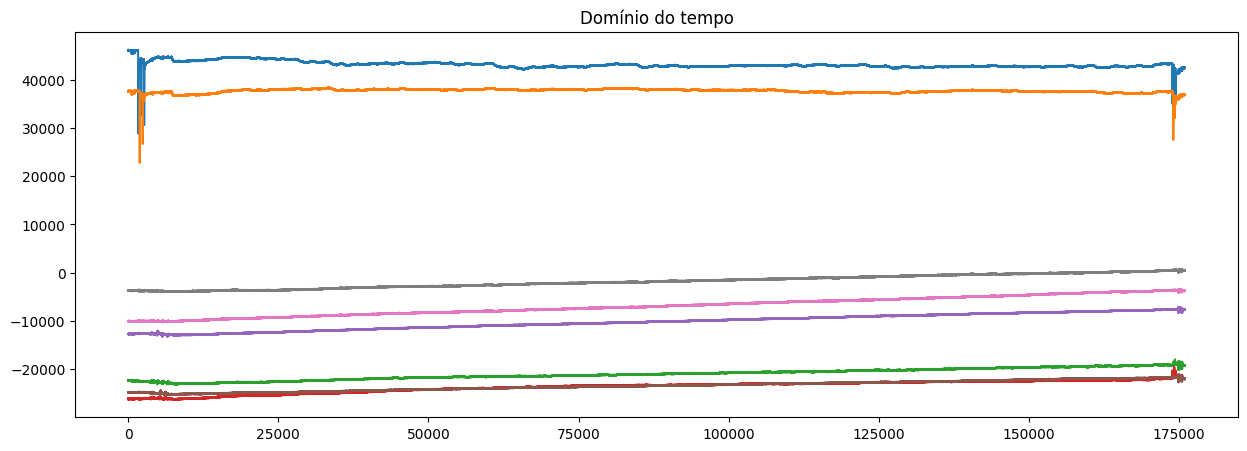

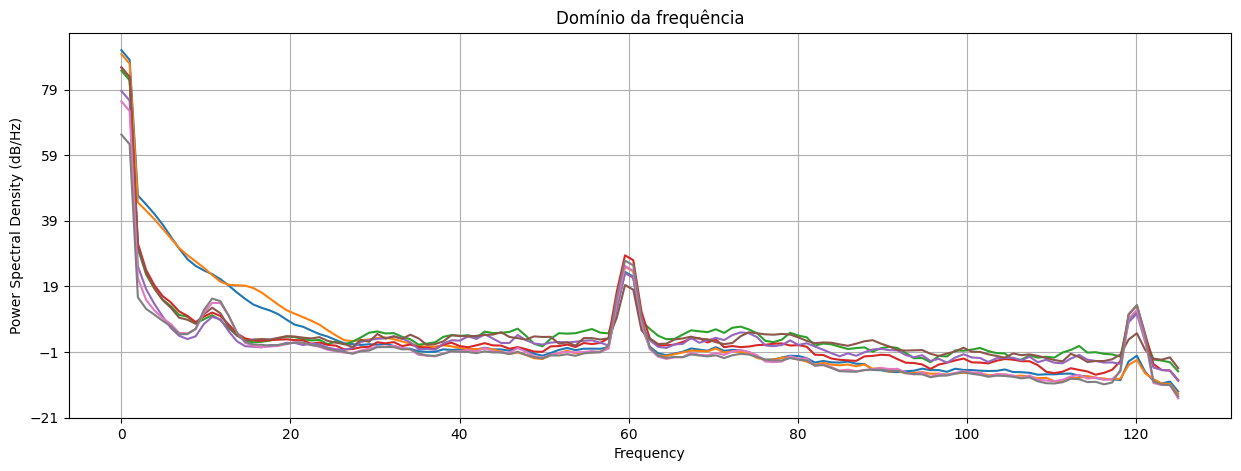

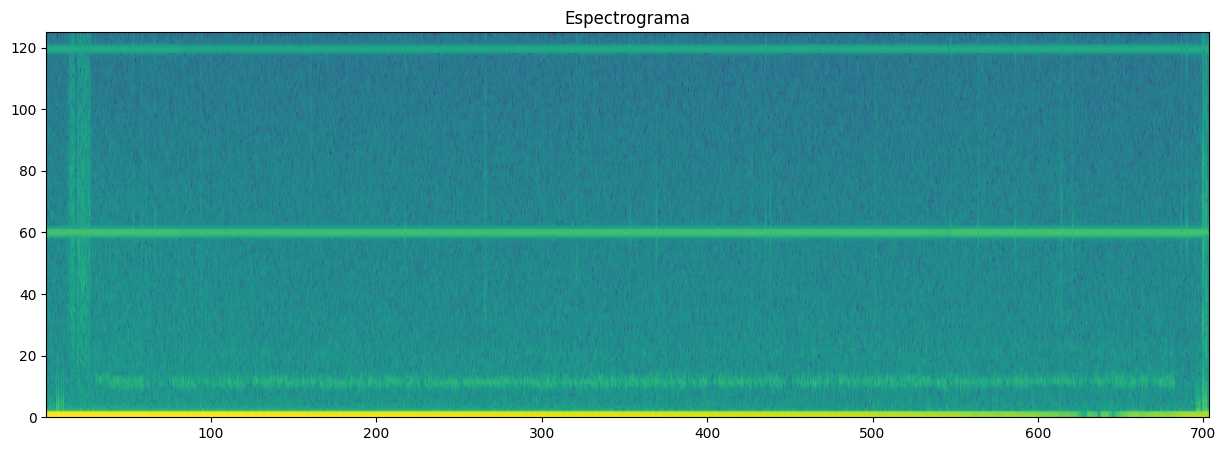

In [93]:
rcParams['figure.figsize'] = [15., 5.]
print_graphs(X)

O gráfico no domínio do tempo causa a impressão de linearidade, pois a quantidade de dados é grande e a magnitude  dos canais são diferentes. Para se ter uma ideia melhor do sinal no domínio do tempo, vamos imprimir apenas um canal com 10% dos dados:

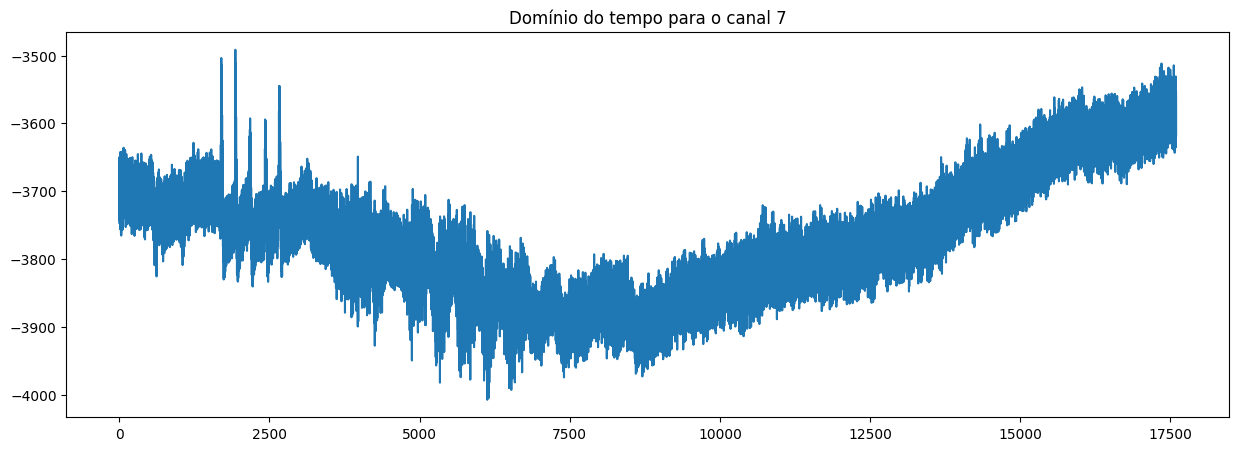

In [74]:
ch = 7
plt.plot(X[ch,:int(X.shape[1]/10)])
plt.title(f'Domínio do tempo para o canal {ch}')
plt.show()

Não é muito justo cortar o começo ou meio do sinal. Então há uma operação que realiza está operação mais uniformemente. Tal operação é chamada de **reamostragem** ou `resample`. Exemplo:

In [75]:
X_rs = resample(X, int(X.shape[1]/10), axis=-1)
print(X_rs.shape, X.shape)

(8, 17595) (8, 175952)


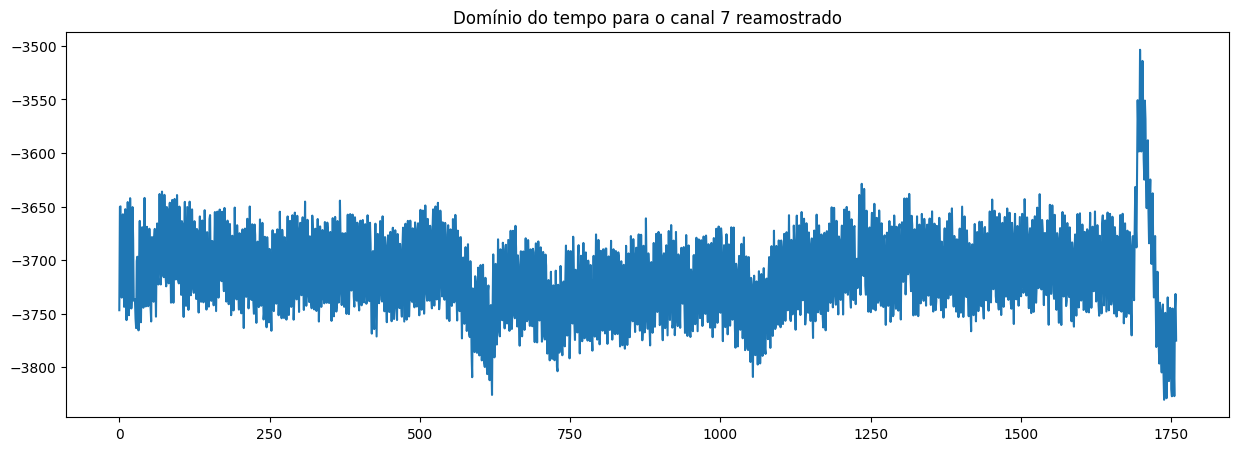

In [80]:
plt.plot(X[ch,:int(X_rs.shape[1]/10)])
plt.title(f'Domínio do tempo para o canal {ch} reamostrado')
plt.show()

**Tarefa**:
- Fazer a média dos 8 eletrodos e realizar os plots de todos os domínios

## Aplicação dos filtros temporais

Para a aplicação dos filtros temporais, serão utilizadas as seguintes funções a seguir:

In [94]:
def butter_bandpass(data, lowcut, highcut, fs=200, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='bandpass')
    return signal.filtfilt(b, a, data)


def butter_lowpass(data, lowcut, fs=200, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    b, a = signal.butter(order, low, btype='lowpass')
    return signal.filtfilt(b, a, data)


def butter_highpass(data, highcut, fs=200, order=4):
    nyq = fs * 0.5
    high = highcut / nyq
    b, a = signal.butter(order, high, btype='highpass')
    return signal.filtfilt(b, a, data)


def butter_notch(data, cutoff, var=1, fs=200, order=4):
    nyq = fs * 0.5
    low = (cutoff - var) / nyq
    high = (cutoff + var) / nyq
    b, a = signal.iirfilter(order, [low, high], btype='bandstop', ftype="butter")
    return signal.filtfilt(b, a, data)

# ToDo: definir taxa de amostragem global

### Apresentação do sinal com a aplicação do filtro "notch"

In [ ]:
# ToDo: aplicar filtro em um dado com cópia profunda

### Apresentação do sinal com a aplicação do filtro "bandpass"

In [ ]:
# ToDo: aplicar filtro em um dado com cópia profunda

### Apresentação do sinal com a aplicação do filtro "notch", seguido por "lowpass" e "highpass"

In [ ]:
# ToDo: aplicar o conjunto de filtros em um dado com cópia profunda

### Apresentação do sinal com a aplicação do filtro "notch", seguido por "lowpass" e "highpass" 10 vezes

In [ ]:
# ToDo: aplicar o conjunto de filtros em um dado com cópia profunda em um laço

### Apresentação do sinal com a aplicação do filtro "notch", seguido por "lowpass" e "highpass" 10 vezes em gráficos separados

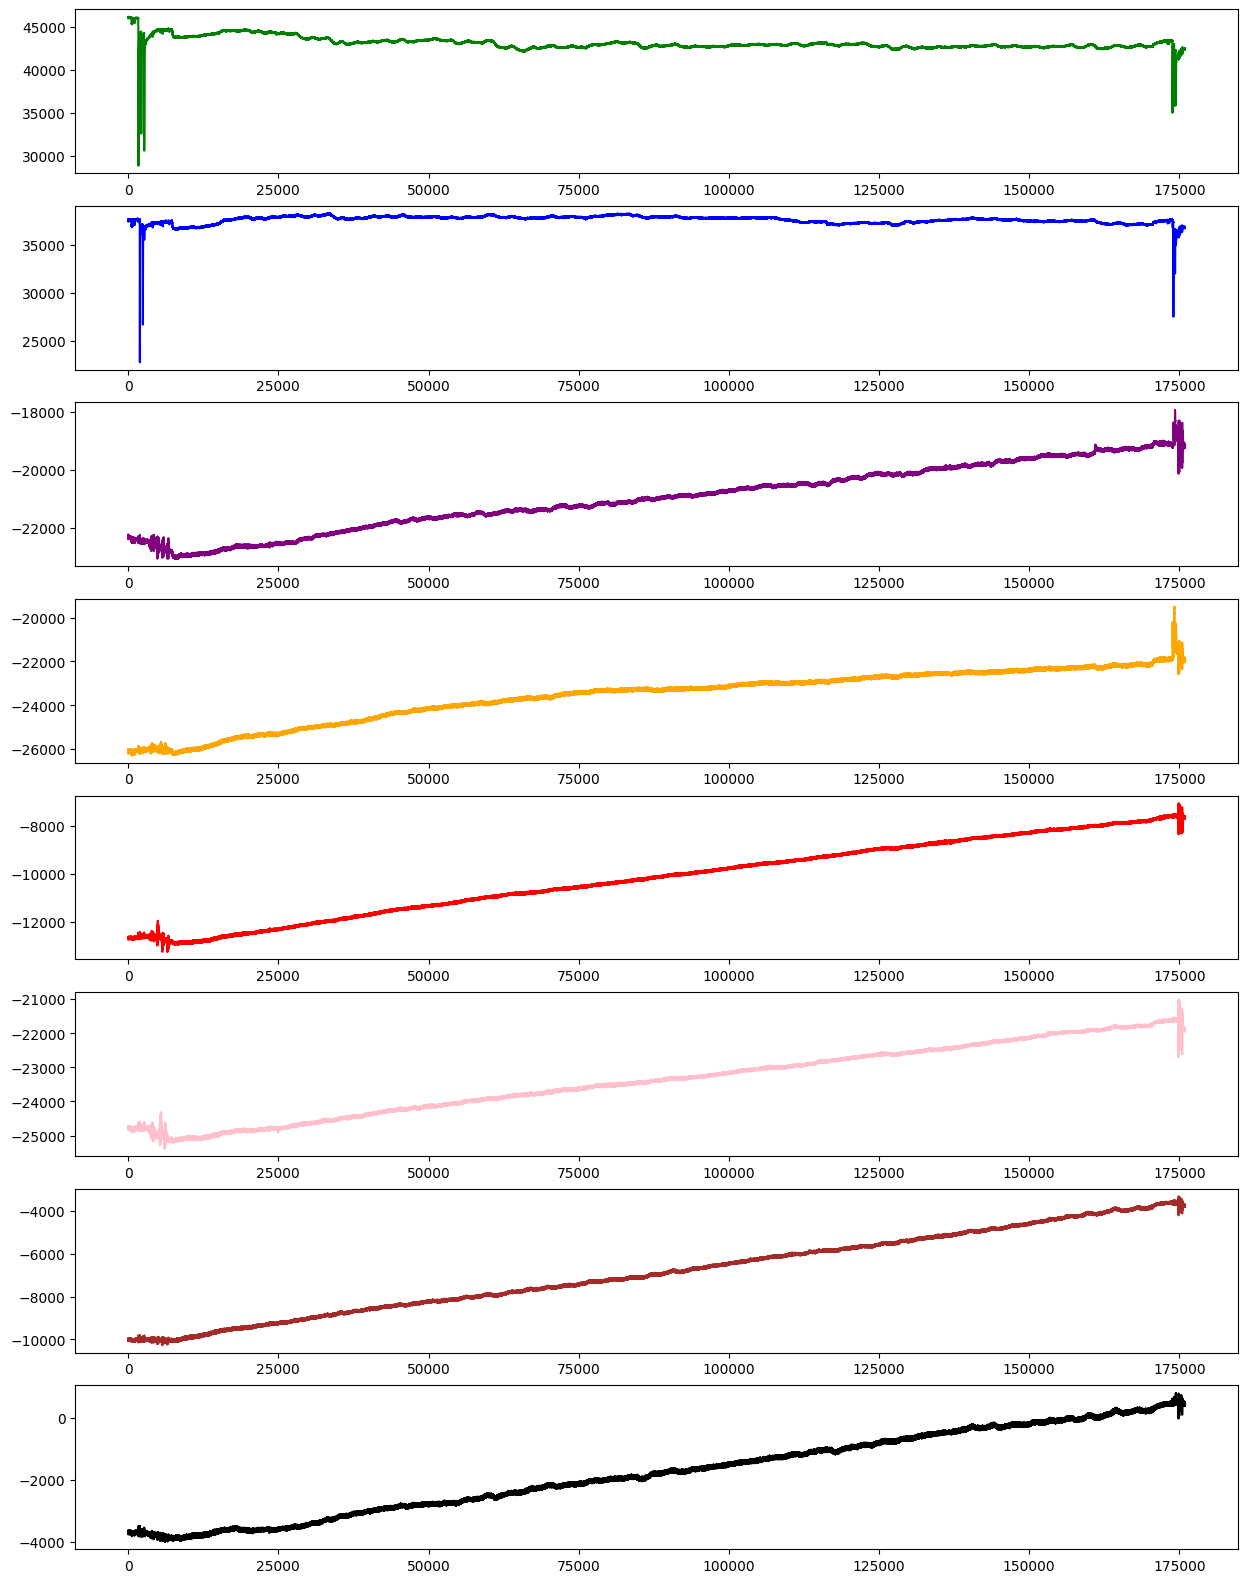

In [108]:
# ToDo: adequar dados e aplicar o conjunto de filtros em um dado com cópia profunda em um laço

rcParams['figure.figsize'] = [15., 20.]
fig, axes = plt.subplots(8, 1)
colors = ('green', 'blue', 'purple', 'orange', 'red', 'pink', 'brown', 'black')
for i, ax in enumerate(axes.flatten()):
    ax.plot(X[i,:], color=colors[i])

**Tarefas**:
1. Refaça o gráfico dos dados filtrados no domínio do tempo com uma **reamostragem** adequada.
2. Grave os dados filtrados (analise a melhor faixa de frequência para a aplicação desejada) em um novo arquivo numpy

**Desafio**:
- Ana